In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn import preprocessing
from sklearn import svm



cancer = load_breast_cancer()


In [24]:
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names

df.head

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

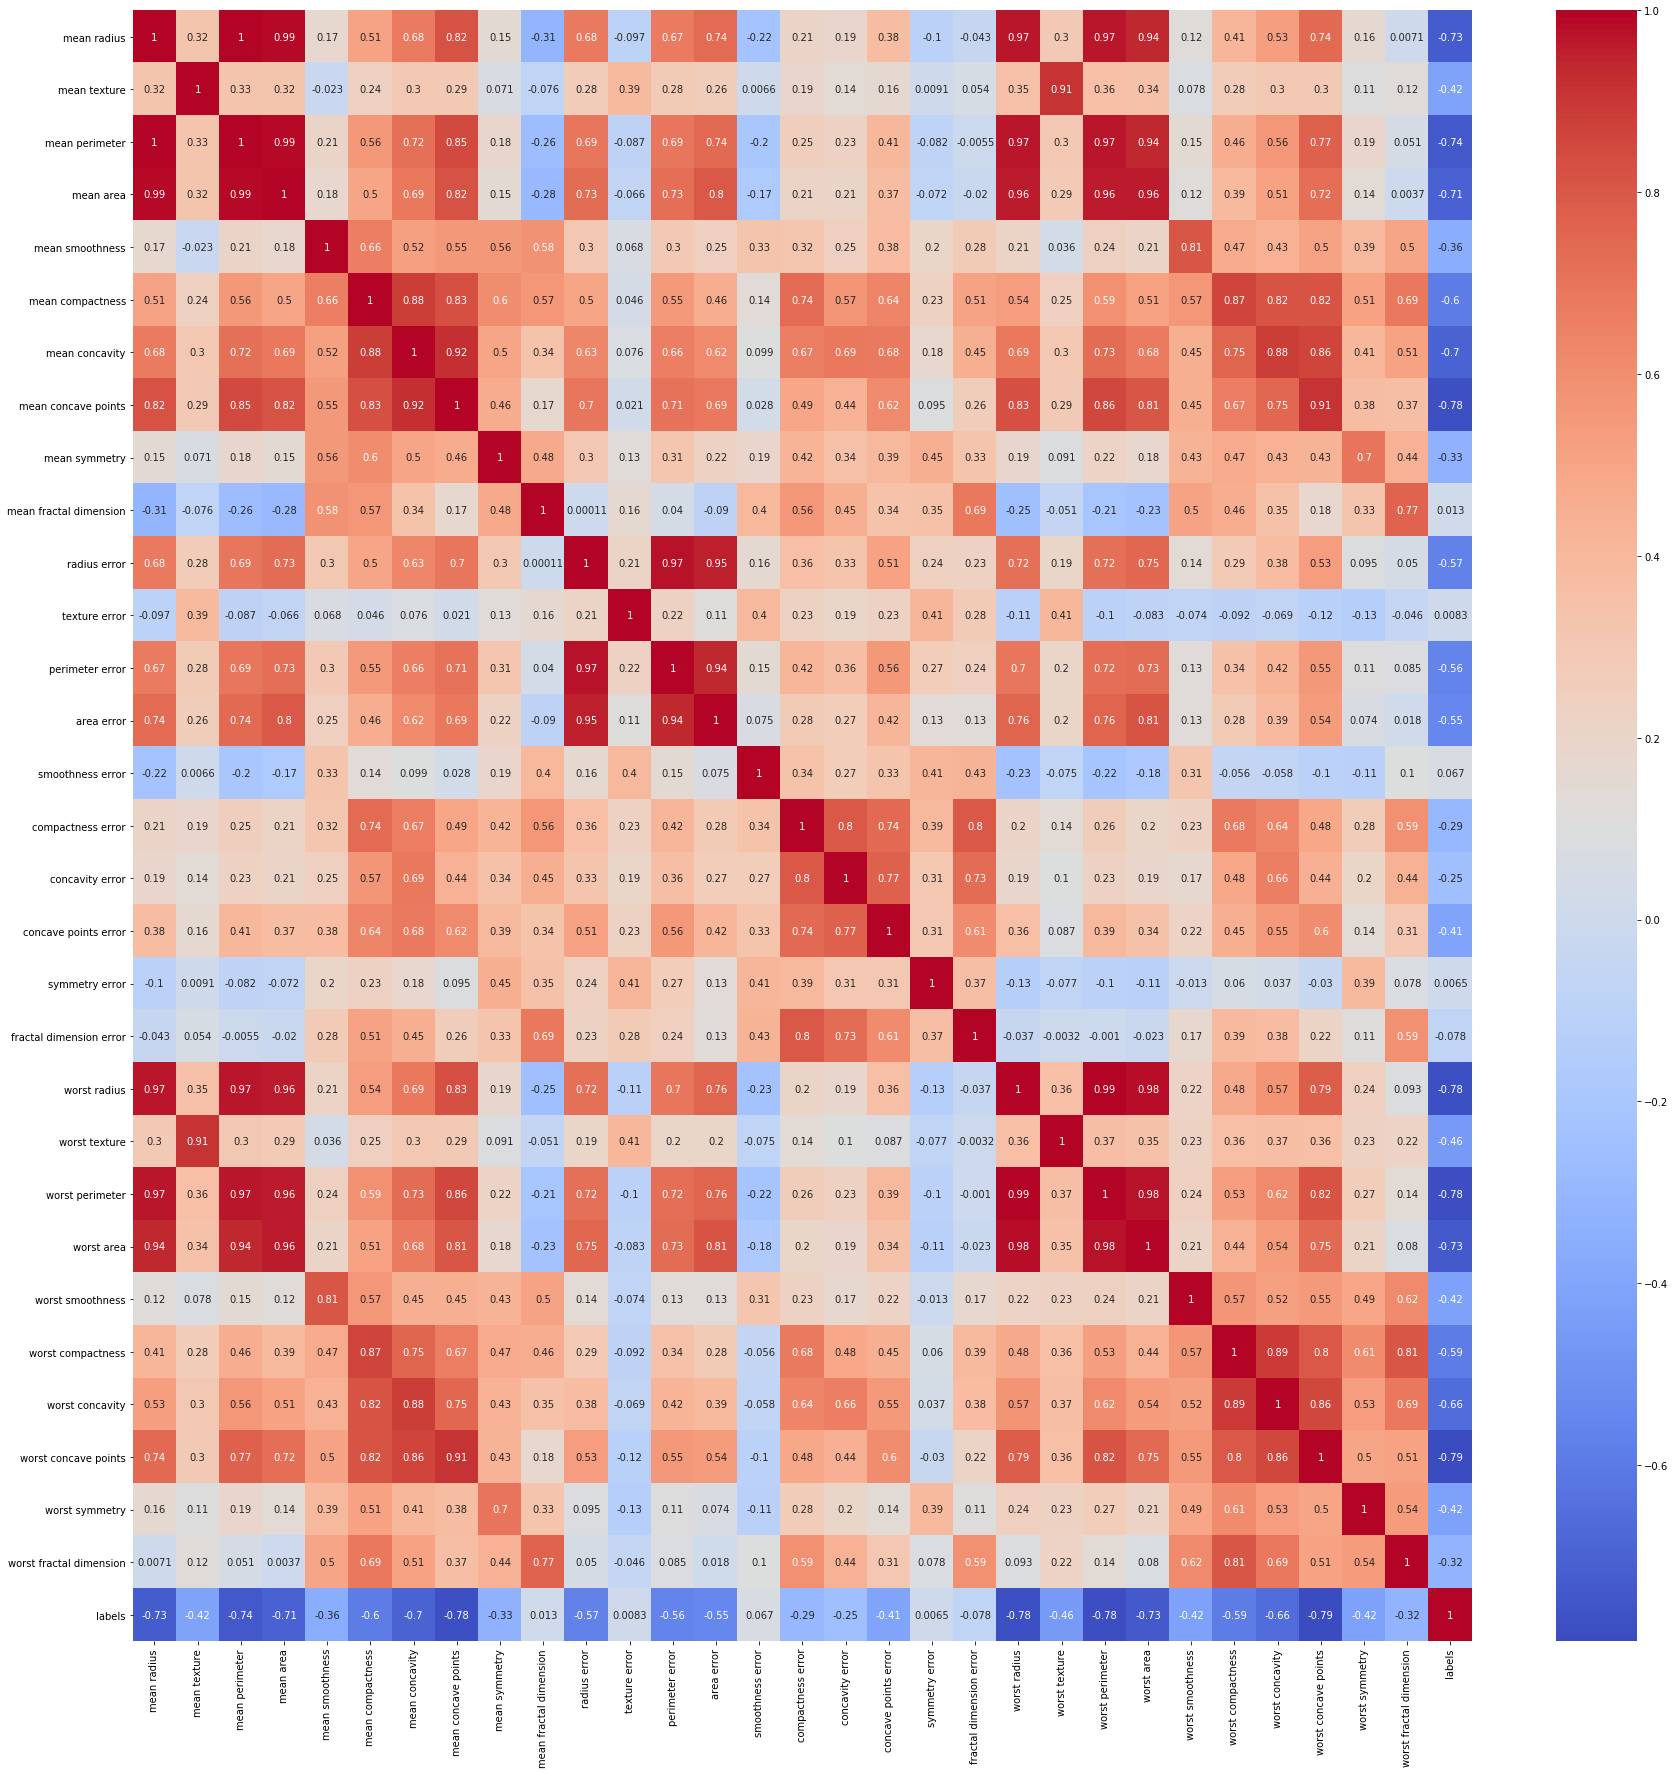

In [25]:
df['labels']= cancer.target
plt.figure(figsize = (30,30))
#correlation heatmap to check for correlation between features and labels
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

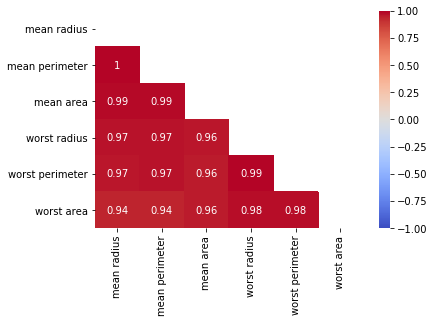

In [26]:
#check for collinearity
df_features = df[['mean radius', 'mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area']]

matrix = np.triu(df_features.corr())
sns.heatmap(df_features.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix )

In [27]:
#remake data frame for scaling
df = df.drop(['labels'], axis=1)
standard_scaler = preprocessing.StandardScaler()
df_transformed = standard_scaler.fit_transform(df)

df_transformed = pd.DataFrame(df_transformed)
df_transformed.columns = cancer.feature_names
df_transformed['labels'] = cancer.target

In [29]:
#SVM model instanisation
model = svm.SVC(kernel='poly',C=1, degree=2)

In [35]:
#split data for testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_transformed, df_transformed.labels, test_size=0.25, random_state=0)
#train
model.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
#make predictions
predictions = model.predict(X_test)

In [37]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [38]:
print(confusion_matrix)

[[40 13]
 [ 3 87]]


In [ ]:
acc = (confusion_matrix[1,1]+confusion_matrix[0,0])/(confusion_matrix[0,0]+confusion_matrix[0,1])+confusion_matrix[1,0]+confusion_matrix[0,0]))